# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
import torch
!nvidia-smi
device = "cuda" if torch.cuda.is_available() else "cpu"
device

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



'cpu'

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


1.13.1+cu116


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Automotive industry
2. Medical industry 
3. Robotics

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Early stopping : Early stopping pauses the training phase before the machine learning model learns the noise in the data. However, getting the timing right is important; else the model will still not give accurate results
2. Regularization :These methods try to eliminate those factors that do not impact the prediction outcomes by grading features based on importance
3. Data augmentation : Data augmentation is a machine learning technique that changes the sample data slightly every time the model processes it.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Yes its done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(root = "data",
                            train =True,
                            download = True,
                            transform= ToTensor(), 
                            target_transform = None)
test_data = datasets.MNIST(root = "data",
                            train =False,
                            download = True,
                            transform= ToTensor(), 
                            target_transform = None)
classname = train_data.classes
classname

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

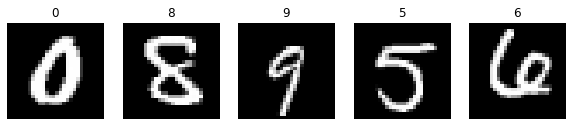

In [5]:
import matplotlib.pyplot as plt
import torch
fig = plt.figure(figsize=(10,10))
row, col =1,5
for i in range(1,row*col+1):
  random_idx =torch.randint(0,len(train_data),size =[1]).item()
  #print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(row,col,i)
  plt.imshow(img.permute(1,2,0),cmap = 'gray')
  plt.title(label)
  plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              shuffle=True,
                              batch_size = BATCH_SIZE)
test_dataloader = DataLoader(dataset = test_data,
                              shuffle=False,
                              batch_size = BATCH_SIZE)
img, l = next(iter(train_dataloader))
print(img.shape)

torch.Size([32, 1, 28, 28])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
import torch.nn as nn
class MNISTModel(nn.Module):
  """
  Model Architeture that Replicates the TinyVGG
  model from Cnn Explainer website.
  """

  def __init__(self,input_shape:int,
               hidden_units : int,
               output_shape :int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride =2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
        
    )
    self.classifer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features = output_shape)   
    )

  def forward(self,x):
    x =self.conv_block_1(x)
    #print(f"Output shape of conv1: {x.shape}")
    x= self.conv_block_2(x)
    #print(f"Output shape of conv2: {x.shape}")
    x = self.classifer(x)
    #print(f"Output shape of classifer : {x.shape}")
    return x

model = MNISTModel(1,10,len(classname)).to(device)
model

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [8]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from  torchmetrics import Accuracy as accuracy
accuracy = accuracy(task="multiclass", num_classes=len(classname)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(),lr= 0.01)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
def train_step(model:torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer :torch.optim.Optimizer,
               accuracy,
               device : torch.device = device):
  """performs a training with model ttrying to learn on data_loader."""
  # put model into a training mode
  model.train()

  train_loss,train_acc = 0,0 
  # Add a loop to loop through the training batches 
  for batch ,(X,y) in enumerate(data_loader):
    X,y =X.to(device),y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss #accumulate train loss
    train_acc += accuracy(y_pred.argmax(dim=1),y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #if batch % 400 ==0:
      #print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total Train loss and accuracy by length of train dataloader
  train_loss /=len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss:{train_loss:.5f} | train acc: {train_acc*100:.2f}%")

def test_step(model:torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy,
               device : torch.device = device):
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test,y_test =X_test.to(device),y_test.to(device)
      test_pred = model(X_test)
      loss = loss_fn(test_pred,y_test)
      test_loss +=loss
      test_acc += accuracy(test_pred.argmax(dim=1),y_test)
      #print(test_acc)
    test_loss/=len(data_loader)
    test_acc /=len(data_loader)
    print(f"test loss : {test_loss:.5f} | test acc : {test_acc*100:.2f}%  ")

In [11]:
def print_train_time(start:float,
                     end:float,
                     device:torch.device =None):
  '''prints difference between start and end time.'''
  total_time = end - start
  print(f"Train time on {device}: {total_time : .3f} seconds" )
  return total_time

In [13]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)


#Measure time
from timeit import default_timer as timer
train_time_start_model = timer()

#Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model = model,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy = accuracy,
             device = device)
  test_step(model,
             test_dataloader,
             loss_fn,
             accuracy,
             device = device)

  train_time_end_model = timer()
  total_train_time_model = print_train_time(train_time_start_model,
                                            train_time_end_model,
                                            device = device)
  

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss:0.09151 | train acc: 97.22%
test loss : 0.08834 | test acc : 97.57%  
Train time on cpu:  60.416 seconds
Epoch: 1
---------
Train loss:0.08439 | train acc: 97.45%
test loss : 0.11030 | test acc : 96.72%  
Train time on cpu:  113.712 seconds
Epoch: 2
---------
Train loss:0.08504 | train acc: 97.49%
test loss : 0.08858 | test acc : 97.37%  
Train time on cpu:  177.787 seconds
Epoch: 3
---------
Train loss:0.09201 | train acc: 97.23%
test loss : 0.08368 | test acc : 97.43%  
Train time on cpu:  241.974 seconds
Epoch: 4
---------
Train loss:0.08354 | train acc: 97.42%
test loss : 0.07053 | test acc : 97.88%  
Train time on cpu:  303.204 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

  0%|          | 0/313 [00:00<?, ?it/s]

Predicted labels tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
org labels tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])


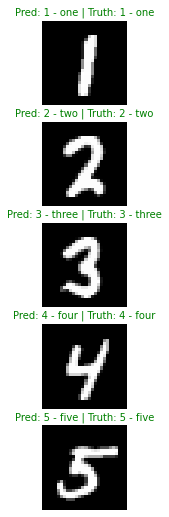

In [25]:
torch.manual_seed(42)

  
loss,acc = 0,0
model.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader):

    y_pred = model(X)

  
    loss+= loss_fn(y_pred,y)
    acc +=accuracy (y,y_pred.argmax(dim=1))

  loss /= len(test_dataloader)
  acc /= len(test_dataloader)

print("Predicted labels",y_pred[0:10].argmax(1))   
print("org labels",y[0:10])

y_pred5 = y_pred[0:5].argmax(1)
y5 = y[0:5]
  # Plot predictions
plt.figure(figsize=(9, 9))
nrows = 5
ncols = 1
for i in range(5):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(X[i].squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = classname[y_pred5[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = classname[y5[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)


Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [46]:
# See if torchmetrics exists, if not, install it

import torchmetrics, mlxtend
print(f"mlxtend version: {mlxtend.__version__}")
assert int(mlxtend.__version__.split(".")[1]) <= 19, "mlxtend verison should be 0.19.0 or higher"


mlxtend version: 0.14.0


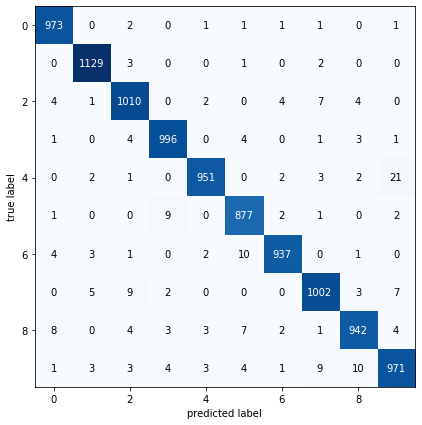

In [43]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(classname), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
classname =['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']
# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    #class_names =classname,
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [47]:

random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape
     

torch.Size([1, 3, 64, 64])

In [48]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?